# Random Forests

### What is Random Forests?
- Random Forests is technically the bagging method as it follows a lot of the same things that bagging does. This consists of combining many classifiers to provide solutions to complex problems. Random Forest also predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome. Now you might be asking yourself in what way is Random forests different from bagging? Random forests only takes a subset of features which are selected at random out of the total and the best split feature from the subset is used to split each node in a tree. Bagging is able to use all feautures in considering a good split for a node.

### Pros and Cons
Pros
- Can be used for both classification and regression tasks.

- Works well with both categorical and numerical data.

- Are not influenced by outliers in our data to a fair degree.

- Can handle linear and non linear relationships in our data well.

Cons
- Not easily interpretable, they provide feature importance but it does not provide complete visibility into the coefficients as linear regression.

- You have very little control over what the model does.

![alt text](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/decision-tree-nodes.png)



We will be using the same data as bagging.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


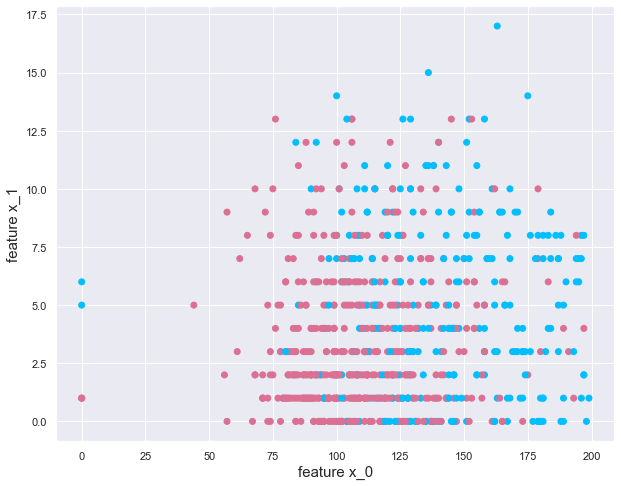

In [2]:
X = df[["Glucose", "Pregnancies"]].values
y = df.Outcome.values

colors = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y]
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()


This will give us our test splits while training the data and also show us how accurate the model is given the training data on random forests, decision trees, and bagging.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 200,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       206
           1       0.50      0.53      0.52       102

    accuracy                           0.67       308
   macro avg       0.63      0.64      0.63       308
weighted avg       0.68      0.67      0.67       308
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       206
           1       0.73      0.34      0.47       102

    accuracy                           0.74       308
   macro avg       0.74      0.64      0.65       308
weighted avg       0.74      0.74      0.71       308
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       206
           1       0.73      0.34      0.47       102

    accuracy                           0.74       308
   macro avg       0.74      0.64     

This will show the best estimators possible for the best overal average.

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [1, 2, 3, None], "criterion":["gini", "entropy"], 
"n_estimators": [100, 200, 400, 500, 750, 1000], 
"bootstrap": [True], "n_jobs": [-1]}

rForest = RandomForestClassifier()
classifier = GridSearchCV(rForest, parameters)
classifier.fit(X_train, y_train)
classifier_pred = classifier.predict(X_test)
print(f"Best Random Forest Classification Report")
print(classification_report(y_test, classifier_pred), "\n")


Best Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       206
           1       0.74      0.41      0.53       102

    accuracy                           0.76       308
   macro avg       0.75      0.67      0.68       308
weighted avg       0.75      0.76      0.73       308
 



In [14]:

#classifier.cv_results_.keys()
classifier.cv_results_["params"][1]


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 1,
 'n_estimators': 200,
 'n_jobs': -1}

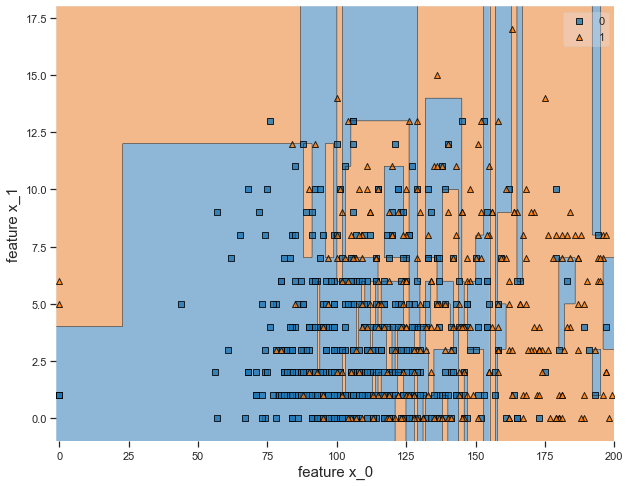

In [15]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


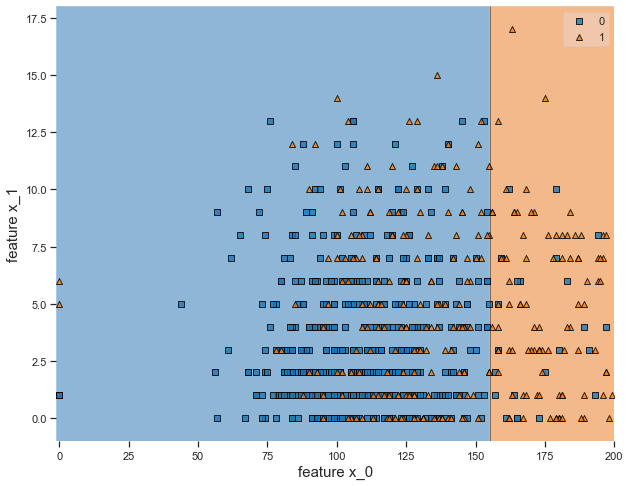

In [16]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

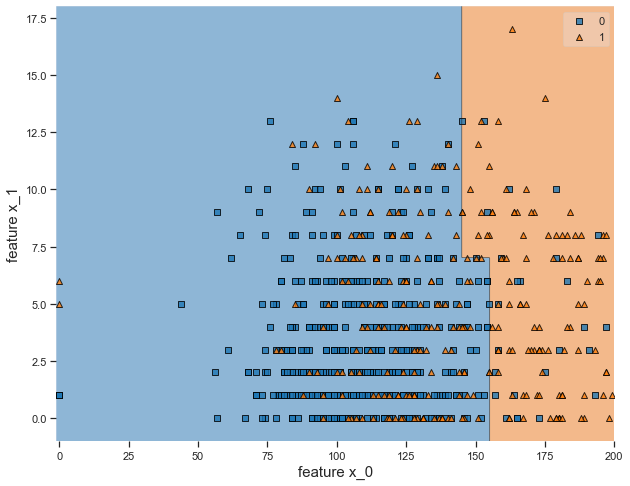

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

X = df[["Glucose", "Pregnancies", "BloodPressure", "Age"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 200,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       205
           1       0.54      0.53      0.54       103

    accuracy                           0.69       308
   macro avg       0.66      0.65      0.66       308
weighted avg       0.69      0.69      0.69       308
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       205
           1       0.70      0.46      0.55       103

    accuracy                           0.75       308
   macro avg       0.73      0.68      0.69       308
weighted avg       0.75      0.75      0.74       308
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       205
           1       0.70      0.46      0.55       103

    accuracy                           0.75       308
   macro avg       0.73      0.68     